In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Lendo os dados do arquivo CSV
df = pd.read_csv('Wholesale customers data.csv')

# Visualizando as primeiras linhas
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df = df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
# Criar o modelo KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

# Obter os grupos
groups = model.predict(df_scaled)


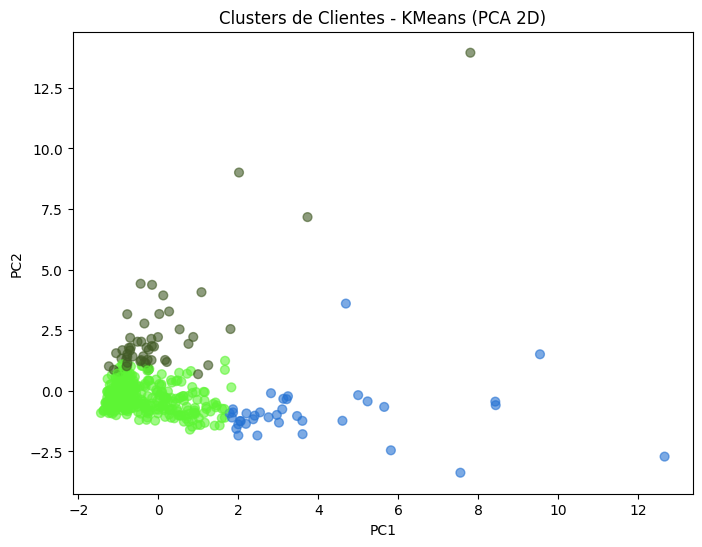

In [6]:
# PCA 2D
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df_scaled)

# DataFrame para visualização
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC1', 'PC2']
df_pca['group'] = groups

# Plot 2D
colors = ['#5DF534', '#425B26', '#2572D3']  # 3 cores para 3 clusters
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha=0.6, s=40)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters de Clientes - KMeans (PCA 2D)')
plt.show()


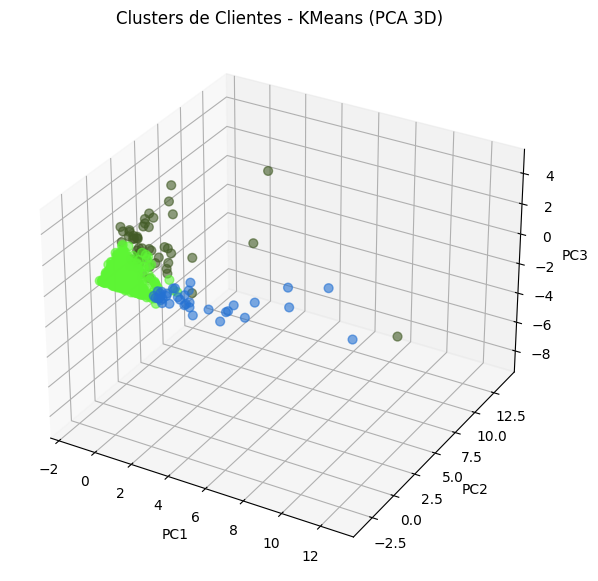

In [7]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_array = pca.fit_transform(df_scaled)

df_pca_3d = pd.DataFrame(data=pca_array)
df_pca_3d.columns = ['PC1', 'PC2', 'PC3']
df_pca_3d['group'] = groups
df_pca_3d['color'] = df_pca_3d['group'].map({0:colors[0], 1:colors[1], 2:colors[2]})

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['color'], alpha=0.6, s=40)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters de Clientes - KMeans (PCA 3D)')
plt.show()
